In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize

%matplotlib inline

In [2]:
n = 15
xs = np.linspace(0, 5, num=n)
w = 0.75

ys = w * xs

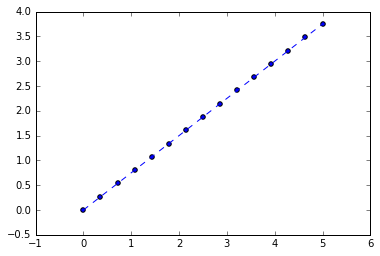

In [3]:
plt.scatter(xs, ys)
plt.plot([0, 5], [0, 5 * w], '--')

In [4]:
def loss_n_power(w, xs, ys, n = 2):
    return np.mean(np.abs((xs * w - ys)) ** n)

In [5]:
def fit(xs, ys, n = 2):
    opt = optimize.minimize_scalar(loss_n_power, bracket=(0.0, 10.0), method="golden", args=(xs, ys, n), tol=1.0e-9)
    return opt.x

In [6]:
def fit_k_times(xs, ys, k, n = 2):
    coefs = []
    for i in range(k):
        noise = np.random.normal(size=xs.shape[0])
        w = fit(xs, ys + noise, n = n)
        coefs.append(w)
    return np.array(coefs)

In [7]:
ws1 = fit_k_times(xs, ys, 10000, n = 1)

In [8]:
ws2 = fit_k_times(xs, ys, 10000, n = 2)

In [9]:
ws4 = fit_k_times(xs, ys, 10000, n = 4)

In [21]:
ws05 = fit_k_times(xs, ys, 10000, n = 0.5)

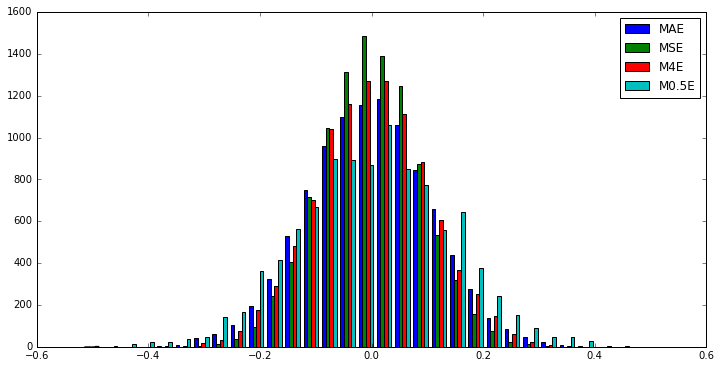

In [22]:
plt.figure(figsize=(12, 6))
plt.hist([ws1 - w, ws2 - w, ws4 - w, ws05 - w], bins=30, label=['MAE', 'MSE', 'M4E', 'M0.5E'])
plt.legend()
plt.show()

In [14]:
print 'Bias:', np.mean(ws1 - w)
print 'Std:', np.std(ws1 - w)

Bias: -0.000469413878281
Std: 0.109684413883


In [15]:
print 'Bias:', np.mean(ws2 - w)
print 'Std:', np.std(ws2 - w)

Bias: -0.00143239588203
Std: 0.0882468830486


In [16]:
print 'Bias:', np.mean(ws4 - w)
print 'Std:', np.std(ws4 - w)

Bias: -0.000397504906125
Std: 0.101810784235


In [23]:
print 'Bias:', np.mean(ws05 - w)
print 'Std:', np.std(ws05 - w)

Bias: -0.000502299615457
Std: 0.134766087578
